<h2 style="color:crimson">Ejercicios</h2>

En los ejercicios 1 a 5 analizaremos la volatilidad CEMEX (`"CEMEXCPO MF Equity"`).

1. Declara la variable `cemex_close` siendo esta la columna `PX_LAST` dentro del DataFrame `bmv`; transforma el índice de `cemex_close` a fin de que sea un `DateTimeIndex`; posteriormente, declara la variable `cemex_diff` que contenga la diferencia de precios entre un día y el siguiente (**hint**: ocupa el método `shift`)

Crea una figure usando matplotlib con 2 columnas: la primera columna deberá ser el histórico de `cemex_diff`; la segunda columna, un histograma de `cemex_diff` con `bins=20`.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#leer CSV pd.read_csv
ruta = "D:/Documentos/Academico/ITAM/DataS/Modulo3/files/lec02/ipc0019.csv"
bmv = pd.read_csv(ruta)

In [3]:
#creas el DF con solo la info a usar
cemex = (bmv.query("ticker == 'CEMEXCPO MF Equity' & field == 'PX_LAST'")
            .set_index("date")
            .pivot_table(values="value",index = "date",columns=['field'])
        )

#cemex.head()

In [4]:
#cambiar el tipo de dato del index date
date_idx = pd.to_datetime(cemex.index)
cemex.index = date_idx
cemex.rename(columns = {'PX_LAST':'cemex_close'}, inplace = True)


In [5]:
#agregar la columna con la diferencia vs el dia anterior
cemex = cemex.assign(cemex_diff = cemex["cemex_close"] - cemex["cemex_close"].shift(periods=1))
cemex.head()

field,cemex_close,cemex_diff
date,,
2000-01-03,8.14,NaN
2000-01-04,7.62,-0.52
2000-01-05,7.61,-0.01
2000-01-06,7.50,-0.11
2000-01-07,7.58,0.08


Text(0.5, 1.0, 'Frecuencia de las diferencias')

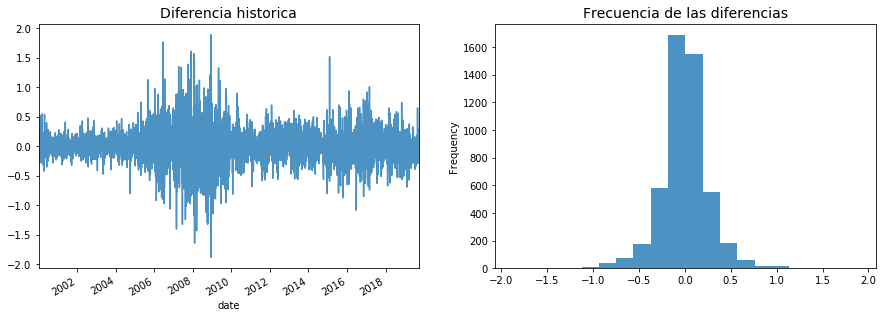

In [6]:
#plot de las diferenias históricas y de su frecuencia
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
cemex['cemex_diff'].plot(ax=ax1,alpha=0.8,label="diff historica")
cemex['cemex_diff'].plot.hist(ax=ax2,bins=20,alpha=0.8,label="diff freq")
ax1.set_title("Diferencia historica", fontsize=14)
ax2.set_title("Frecuencia de las diferencias", fontsize=14)



In [7]:
fig.savefig('grafico_diff_cemex.pdf')

2. Realiza un _downsampling_ de `cemex_diff`: calcula la desviación estándar por trimestre del inicio de la historia hasta el 1 de junio de 2018. Guarda la información dentro la variable `cemex_std` y grafica un histograma con `bins=20`

Text(0.5, 1.0, 'Distribucion de frecuencias de las diferencias diarias cemex por trimetre hasta Q2 de 2018')

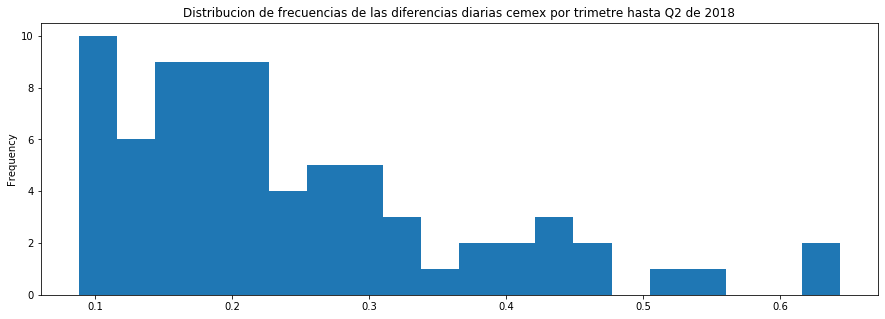

In [8]:
cemex_std = cemex['cemex_diff'][: "2018-06-01"].resample("Q").std()
cemex_std.plot.hist(bins=20,figsize=(15,5))
plt.title("Distribucion de frecuencias de las diferencias diarias cemex por trimetre hasta Q2 de 2018")

3. Realiza nuevamente el ejercicio 3 calculando en este caso la desviación estándar por semana. ¿Qué diferencias observas entre las dos distribuciones de volatilidad?


Text(0.5, 1.0, 'Distribucion de frecuencias de las diferencias diarias cemex por semana hasta Q2 de 2018')

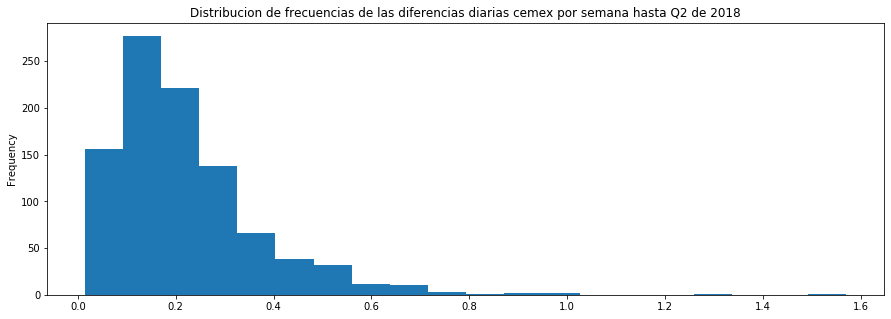

In [9]:
cemex_std = cemex['cemex_diff'][: "2018-06-01"].resample("W").std()
cemex_std.plot.hist(bins=20,figsize=(15,5))
plt.title("Distribucion de frecuencias de las diferencias diarias cemex por semana hasta Q2 de 2018")

## diferencias entre distribución semanal y trimestral
A primera vista y solo como punto de comparación los dos gráficos, me aprece que lo que resalta más es que a mayor granularidad en el tiempo de agrupación la volatilidad es mayor. El espacio muestral es 12 veces mayor por lo que se define mejor la distribución, pero bajo el criterio definido no podemos decir si existe diferencia.

4. En este ejercicio analizaremos la volatilidad por mes considerando `cemex_diff`. Corre el siguiente código y explica que hace:

```python
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")
```

¿Cómo podrías explicar la gráfica resultante?


In [10]:
months = cemex_diff.index.strftime("%B")
monthsN = cemex_diff.index.strftime("%m")
cemex_diff.groupby(months).mean().plot(kind="bar",figsize=(15,5))

NameError: name 'cemex_diff' is not defined

## Grafico resultante
es el promedio de las diferencias de la serie por mes. Explica el valor esperado por mes, se explica en el gráfico en qué mes esperar ganancias y en qué mes esperar pérdidas. 
### el gráfico está ordenando los meses alfabétiamente, quizá en orden de tiempo pudiera explicar alguna tendencia.

In [ ]:
cemex_diff.groupby(monthsN).mean().plot(kind="bar",figsize=(15,5))

5. Realiza nuevamente el ejercicio 4 considerando `cemex_close`. ¿Por qué difieren las gráficas?

In [ ]:
months = cemex["cemex_close"].index.strftime("%B")
monthsN = cemex["cemex_close"].index.strftime("%m")
cemex["cemex_close"].groupby(months).mean().plot(kind="bar",figsize=(15,5),ylim=(11,13)).sort_index()

## diferencias entre gráficas
al ser una gráfico de diferencias y el otro de valores, uno tiene naturaleza positiva y el otro no.
uno grafica movimientos entre dias y el otro el movimiento de los valores de los dias. aunque en diferencias la escala es menor, es proporcional a los movimientos, aunmentando los valores de ragngo para mostrar los cambios absolutos entre gráficos son pequeños.
### igualmente el gráfico está ordenando los meses alfabétiamente, quizá en orden de tiempo pudiera explicar alguna tendencia.

In [23]:
months = cemex["cemex_close"].index.strftime("%B")
cemex['cemex_diff'].groupby(months).mean()


April        0.016917
August       0.008494
December     0.011292
February    -0.016244
January      0.010559
July        -0.012398
June        -0.001686
March        0.007105
May          0.005860
November     0.015237
October     -0.029028
September   -0.015504
Name: cemex_diff, dtype: float64